In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/EVA5/Week9New/")

In [3]:
!pip install albumentations

In [3]:
import time
import torch
!pip install torchsummary
from data.data_loaders.base_data_loader import BaseDataLoader
from data.base_data_utils import get_data_loaders
from utils.misc_utils import get_device_type
from models.networks.resnet import ResNet18
from configs import basic_config
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from models.model_builder import build_model
from utils import logger_utils
from orchestrators.base_orchestrator import start_training
from orchestrators.base_orchestrator import display_classwise_accuracy
from torchsummary import summary
from torchvision.utils import make_grid, save_image
from models.gradcam.utils import visualize_cam
from models.gradcam.gradcam import GradCAM
from data.base_data_utils import sample_data

from data.data_transforms.base_data_transforms import UnNormalize

from models.gradcam.gen_gradcam import generate_grad_cam_grid
import warnings
warnings.filterwarnings('ignore')

In [4]:
logger = logger_utils.get_logger(__name__)

In [5]:
train_loader, test_loader = get_data_loaders(dataset_name='cifar10')


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
Files already downloaded and verified
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****



In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  cat truck  deer  bird


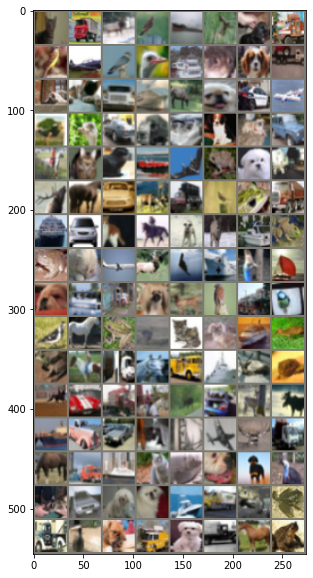

In [7]:
sample_data(train_loader, classes)

In [8]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,32,32))

In [9]:
device = get_device_type()
model = ResNet18().to(device)
print_summary(model,'Network summary')

Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14   

In [11]:
EPOCHS = basic_config.EPOCHS
device = get_device_type()
results = {}

models_dict = {'resnet18': {'model': model}
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []

In [12]:


## Training

results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)

  0%|          | 0/391 [00:00<?, ?it/s]


**** Started training ****


Model: resnet18

0 0
[EPOCH:0]


Loss=1.5496102571487427 Batch_id=390 Current_train_batch_accuracy=33.34: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 1.5244, Accuracy: 21962/50000 (43.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.5098, Accuracy: 4491/10000 (44.91%)

best_test_accuracy 44.91
[EPOCH:1]


Loss=1.0029418468475342 Batch_id=390 Current_train_batch_accuracy=51.06: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 1.1884, Accuracy: 28506/50000 (57.01%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2578, Accuracy: 5501/10000 (55.01%)

best_test_accuracy 55.01
[EPOCH:2]


Loss=1.0099105834960938 Batch_id=390 Current_train_batch_accuracy=60.58: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 1.0354, Accuracy: 31473/50000 (62.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1169, Accuracy: 6094/10000 (60.94%)

best_test_accuracy 60.94
[EPOCH:3]


Loss=1.0519134998321533 Batch_id=390 Current_train_batch_accuracy=66.86: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 1.0274, Accuracy: 31775/50000 (63.55%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0673, Accuracy: 6331/10000 (63.31%)

best_test_accuracy 63.31
[EPOCH:4]


Loss=0.7864797115325928 Batch_id=390 Current_train_batch_accuracy=72.45: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.7301, Accuracy: 37189/50000 (74.38%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8498, Accuracy: 7140/10000 (71.40%)

best_test_accuracy 71.4
[EPOCH:5]


Loss=0.5408192276954651 Batch_id=390 Current_train_batch_accuracy=76.42: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.6434, Accuracy: 38760/50000 (77.52%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7272, Accuracy: 7560/10000 (75.60%)

best_test_accuracy 75.6
[EPOCH:6]


Loss=0.6596862077713013 Batch_id=390 Current_train_batch_accuracy=79.17: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.5221, Accuracy: 41000/50000 (82.00%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6475, Accuracy: 7819/10000 (78.19%)

best_test_accuracy 78.19
[EPOCH:7]


Loss=0.6457079648971558 Batch_id=390 Current_train_batch_accuracy=81.58: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.4738, Accuracy: 41631/50000 (83.26%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5931, Accuracy: 7987/10000 (79.87%)

best_test_accuracy 79.87
[EPOCH:8]


Loss=0.5164746046066284 Batch_id=390 Current_train_batch_accuracy=83.41: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.4383, Accuracy: 42389/50000 (84.78%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5899, Accuracy: 8089/10000 (80.89%)

best_test_accuracy 80.89
[EPOCH:9]


Loss=0.396659791469574 Batch_id=390 Current_train_batch_accuracy=84.77: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.3984, Accuracy: 43212/50000 (86.42%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5423, Accuracy: 8229/10000 (82.29%)

best_test_accuracy 82.29
[EPOCH:10]


Loss=0.5038787126541138 Batch_id=390 Current_train_batch_accuracy=85.99: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.4077, Accuracy: 42807/50000 (85.61%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5194, Accuracy: 8216/10000 (82.16%)

best_test_accuracy 82.29
[EPOCH:11]


Loss=0.48734205961227417 Batch_id=390 Current_train_batch_accuracy=86.98: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.3435, Accuracy: 44050/50000 (88.10%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4871, Accuracy: 8444/10000 (84.44%)

best_test_accuracy 84.44
[EPOCH:12]


Loss=0.24738970398902893 Batch_id=390 Current_train_batch_accuracy=88.06: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.2970, Accuracy: 44816/50000 (89.63%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4706, Accuracy: 8453/10000 (84.53%)

best_test_accuracy 84.53
[EPOCH:13]


Loss=0.321280837059021 Batch_id=390 Current_train_batch_accuracy=88.81: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.3102, Accuracy: 44827/50000 (89.65%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4768, Accuracy: 8504/10000 (85.04%)

best_test_accuracy 85.04
[EPOCH:14]


Loss=0.3369251489639282 Batch_id=390 Current_train_batch_accuracy=89.48: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.2653, Accuracy: 45429/50000 (90.86%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4526, Accuracy: 8509/10000 (85.09%)

best_test_accuracy 85.09
[EPOCH:15]


Loss=0.18246904015541077 Batch_id=390 Current_train_batch_accuracy=90.19: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.2878, Accuracy: 45002/50000 (90.00%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4530, Accuracy: 8518/10000 (85.18%)

best_test_accuracy 85.18
[EPOCH:16]


Loss=0.2800973355770111 Batch_id=390 Current_train_batch_accuracy=90.75: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.2277, Accuracy: 46049/50000 (92.10%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4300, Accuracy: 8624/10000 (86.24%)

best_test_accuracy 86.24
[EPOCH:17]


Loss=0.14176033437252045 Batch_id=390 Current_train_batch_accuracy=91.61: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.2211, Accuracy: 46082/50000 (92.16%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4463, Accuracy: 8597/10000 (85.97%)

best_test_accuracy 86.24
[EPOCH:18]


Loss=0.15711472928524017 Batch_id=390 Current_train_batch_accuracy=91.85: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.2004, Accuracy: 46463/50000 (92.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4662, Accuracy: 8545/10000 (85.45%)

best_test_accuracy 86.24
[EPOCH:19]


Loss=0.27288633584976196 Batch_id=390 Current_train_batch_accuracy=92.32: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.2132, Accuracy: 46342/50000 (92.68%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4491, Accuracy: 8579/10000 (85.79%)

best_test_accuracy 86.24
[EPOCH:20]


Loss=0.21100783348083496 Batch_id=390 Current_train_batch_accuracy=92.85: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.1816, Accuracy: 46779/50000 (93.56%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4114, Accuracy: 8735/10000 (87.35%)

best_test_accuracy 87.35
[EPOCH:21]


Loss=0.17678973078727722 Batch_id=390 Current_train_batch_accuracy=93.36: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.1709, Accuracy: 46989/50000 (93.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4148, Accuracy: 8749/10000 (87.49%)

best_test_accuracy 87.49
[EPOCH:22]


Loss=0.17251154780387878 Batch_id=390 Current_train_batch_accuracy=93.81: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.1590, Accuracy: 47206/50000 (94.41%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4784, Accuracy: 8633/10000 (86.33%)

best_test_accuracy 87.49
[EPOCH:23]


Loss=0.22805564105510712 Batch_id=390 Current_train_batch_accuracy=94.06: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.1485, Accuracy: 47327/50000 (94.65%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4110, Accuracy: 8771/10000 (87.71%)

best_test_accuracy 87.71
[EPOCH:24]


Loss=0.1603255569934845 Batch_id=390 Current_train_batch_accuracy=94.49: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.1459, Accuracy: 47415/50000 (94.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3975, Accuracy: 8828/10000 (88.28%)

best_test_accuracy 88.28
[EPOCH:25]


Loss=0.05264927074313164 Batch_id=390 Current_train_batch_accuracy=94.89: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.1186, Accuracy: 47946/50000 (95.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4092, Accuracy: 8805/10000 (88.05%)

best_test_accuracy 88.28
[EPOCH:26]


Loss=0.2484970986843109 Batch_id=390 Current_train_batch_accuracy=95.10: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.1185, Accuracy: 47921/50000 (95.84%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4209, Accuracy: 8799/10000 (87.99%)

best_test_accuracy 88.28
[EPOCH:27]


Loss=0.058695536106824875 Batch_id=390 Current_train_batch_accuracy=95.41: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.1170, Accuracy: 47885/50000 (95.77%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4596, Accuracy: 8750/10000 (87.50%)

best_test_accuracy 88.28
[EPOCH:28]


Loss=0.13187618553638458 Batch_id=390 Current_train_batch_accuracy=95.60: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0996, Accuracy: 48192/50000 (96.38%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4024, Accuracy: 8859/10000 (88.59%)

best_test_accuracy 88.59
[EPOCH:29]


Loss=0.0364016592502594 Batch_id=390 Current_train_batch_accuracy=95.68: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.1056, Accuracy: 48188/50000 (96.38%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3906, Accuracy: 8868/10000 (88.68%)

best_test_accuracy 88.68
[EPOCH:30]


Loss=0.1058090329170227 Batch_id=390 Current_train_batch_accuracy=96.15: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.1021, Accuracy: 48243/50000 (96.49%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4474, Accuracy: 8801/10000 (88.01%)

best_test_accuracy 88.68
[EPOCH:31]


Loss=0.16286912560462952 Batch_id=390 Current_train_batch_accuracy=96.41: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0835, Accuracy: 48509/50000 (97.02%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4292, Accuracy: 8873/10000 (88.73%)

best_test_accuracy 88.73
[EPOCH:32]


Loss=0.06613069772720337 Batch_id=390 Current_train_batch_accuracy=96.56: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0772, Accuracy: 48653/50000 (97.31%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4390, Accuracy: 8846/10000 (88.46%)

best_test_accuracy 88.73
[EPOCH:33]


Loss=0.15278275310993195 Batch_id=390 Current_train_batch_accuracy=96.69: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0872, Accuracy: 48440/50000 (96.88%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4382, Accuracy: 8851/10000 (88.51%)

best_test_accuracy 88.73
[EPOCH:34]


Loss=0.024941401556134224 Batch_id=390 Current_train_batch_accuracy=97.00: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0837, Accuracy: 48549/50000 (97.10%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4174, Accuracy: 8892/10000 (88.92%)

best_test_accuracy 88.92
[EPOCH:35]


Loss=0.04497912526130676 Batch_id=390 Current_train_batch_accuracy=96.93: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]



Train set: Average loss: 0.0683, Accuracy: 48800/50000 (97.60%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4615, Accuracy: 8832/10000 (88.32%)

best_test_accuracy 88.92
[EPOCH:36]


Loss=0.10533535480499268 Batch_id=390 Current_train_batch_accuracy=97.15: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0690, Accuracy: 48758/50000 (97.52%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4338, Accuracy: 8885/10000 (88.85%)

best_test_accuracy 88.92
[EPOCH:37]


Loss=0.00730007654055953 Batch_id=390 Current_train_batch_accuracy=97.30: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0612, Accuracy: 48915/50000 (97.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4368, Accuracy: 8932/10000 (89.32%)

best_test_accuracy 89.32
[EPOCH:38]


Loss=0.06404228508472443 Batch_id=390 Current_train_batch_accuracy=97.55: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0668, Accuracy: 48865/50000 (97.73%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4265, Accuracy: 8954/10000 (89.54%)

best_test_accuracy 89.54
[EPOCH:39]


Loss=0.07934124767780304 Batch_id=390 Current_train_batch_accuracy=97.63: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0555, Accuracy: 49024/50000 (98.05%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4600, Accuracy: 8926/10000 (89.26%)

best_test_accuracy 89.54
[EPOCH:40]


Loss=0.12316324561834335 Batch_id=390 Current_train_batch_accuracy=97.53: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0640, Accuracy: 48926/50000 (97.85%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4162, Accuracy: 8929/10000 (89.29%)

best_test_accuracy 89.54
[EPOCH:41]


Loss=0.041396964341402054 Batch_id=390 Current_train_batch_accuracy=97.82: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0544, Accuracy: 49072/50000 (98.14%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4358, Accuracy: 8904/10000 (89.04%)

best_test_accuracy 89.54
[EPOCH:42]


Loss=0.05042264610528946 Batch_id=390 Current_train_batch_accuracy=97.86: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0518, Accuracy: 49130/50000 (98.26%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4161, Accuracy: 8965/10000 (89.65%)

best_test_accuracy 89.65
[EPOCH:43]


Loss=0.08597822487354279 Batch_id=390 Current_train_batch_accuracy=97.90: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0515, Accuracy: 49140/50000 (98.28%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4283, Accuracy: 9030/10000 (90.30%)

best_test_accuracy 90.3
[EPOCH:44]


Loss=0.07988102734088898 Batch_id=390 Current_train_batch_accuracy=97.89: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0478, Accuracy: 49176/50000 (98.35%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4437, Accuracy: 8976/10000 (89.76%)

best_test_accuracy 90.3
[EPOCH:45]


Loss=0.039284445345401764 Batch_id=390 Current_train_batch_accuracy=98.08: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]



Train set: Average loss: 0.0426, Accuracy: 49271/50000 (98.54%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4237, Accuracy: 8977/10000 (89.77%)

best_test_accuracy 90.3
[EPOCH:46]


Loss=0.010579216293990612 Batch_id=390 Current_train_batch_accuracy=98.25: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0460, Accuracy: 49194/50000 (98.39%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4797, Accuracy: 8905/10000 (89.05%)

best_test_accuracy 90.3
[EPOCH:47]


Loss=0.04665267467498779 Batch_id=390 Current_train_batch_accuracy=98.14: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]



Train set: Average loss: 0.0524, Accuracy: 49097/50000 (98.19%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5692, Accuracy: 8799/10000 (87.99%)

best_test_accuracy 90.3
[EPOCH:48]


Loss=0.050306469202041626 Batch_id=390 Current_train_batch_accuracy=98.28: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0379, Accuracy: 49332/50000 (98.66%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4391, Accuracy: 8969/10000 (89.69%)

best_test_accuracy 90.3
[EPOCH:49]


Loss=0.009918426163494587 Batch_id=390 Current_train_batch_accuracy=98.36: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]



Train set: Average loss: 0.0444, Accuracy: 49262/50000 (98.52%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4646, Accuracy: 8932/10000 (89.32%)

best_test_accuracy 90.3
[EPOCH:50]


Loss=0.024805696681141853 Batch_id=390 Current_train_batch_accuracy=98.46: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]



Train set: Average loss: 0.0336, Accuracy: 49443/50000 (98.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4415, Accuracy: 8968/10000 (89.68%)

best_test_accuracy 90.3
[EPOCH:51]


Loss=0.02008366957306862 Batch_id=390 Current_train_batch_accuracy=98.49: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0365, Accuracy: 49369/50000 (98.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4233, Accuracy: 9004/10000 (90.04%)

best_test_accuracy 90.3
[EPOCH:52]


Loss=0.07778859883546829 Batch_id=390 Current_train_batch_accuracy=98.55: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0315, Accuracy: 49441/50000 (98.88%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4780, Accuracy: 8914/10000 (89.14%)

best_test_accuracy 90.3
[EPOCH:53]


Loss=0.02853306569159031 Batch_id=390 Current_train_batch_accuracy=98.52: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0363, Accuracy: 49346/50000 (98.69%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4874, Accuracy: 8948/10000 (89.48%)

best_test_accuracy 90.3
[EPOCH:54]


Loss=0.030006641522049904 Batch_id=390 Current_train_batch_accuracy=98.79: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0323, Accuracy: 49431/50000 (98.86%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4949, Accuracy: 8956/10000 (89.56%)

best_test_accuracy 90.3
[EPOCH:55]


Loss=0.029168948531150818 Batch_id=390 Current_train_batch_accuracy=98.63: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0286, Accuracy: 49500/50000 (99.00%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4103, Accuracy: 9058/10000 (90.58%)

best_test_accuracy 90.58
[EPOCH:56]


Loss=0.014975572936236858 Batch_id=390 Current_train_batch_accuracy=98.79: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0290, Accuracy: 49511/50000 (99.02%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4615, Accuracy: 8980/10000 (89.80%)

best_test_accuracy 90.58
[EPOCH:57]


Loss=0.11787022650241852 Batch_id=390 Current_train_batch_accuracy=98.85: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0273, Accuracy: 49528/50000 (99.06%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4969, Accuracy: 8971/10000 (89.71%)

best_test_accuracy 90.58
[EPOCH:58]


Loss=0.03592408075928688 Batch_id=390 Current_train_batch_accuracy=98.81: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0259, Accuracy: 49570/50000 (99.14%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4895, Accuracy: 8980/10000 (89.80%)

best_test_accuracy 90.58
[EPOCH:59]


Loss=0.0367540642619133 Batch_id=390 Current_train_batch_accuracy=98.80: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0293, Accuracy: 49491/50000 (98.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4698, Accuracy: 8998/10000 (89.98%)

best_test_accuracy 90.58
[EPOCH:60]


Loss=0.019737806171178818 Batch_id=390 Current_train_batch_accuracy=98.85: 100%|██████████| 391/391 [00:33<00:00, 11.50it/s]



Train set: Average loss: 0.0307, Accuracy: 49467/50000 (98.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4420, Accuracy: 9026/10000 (90.26%)

best_test_accuracy 90.58
[EPOCH:61]


Loss=0.11341492831707001 Batch_id=390 Current_train_batch_accuracy=99.00: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0199, Accuracy: 49672/50000 (99.34%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4811, Accuracy: 9036/10000 (90.36%)

best_test_accuracy 90.58
[EPOCH:62]


Loss=0.06884120404720306 Batch_id=390 Current_train_batch_accuracy=98.89: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]



Train set: Average loss: 0.0230, Accuracy: 49621/50000 (99.24%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4758, Accuracy: 9014/10000 (90.14%)

best_test_accuracy 90.58
[EPOCH:63]


Loss=0.01123091857880354 Batch_id=390 Current_train_batch_accuracy=98.87: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0208, Accuracy: 49631/50000 (99.26%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4601, Accuracy: 9057/10000 (90.57%)

best_test_accuracy 90.58
[EPOCH:64]


Loss=0.1584089696407318 Batch_id=390 Current_train_batch_accuracy=99.16: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0213, Accuracy: 49640/50000 (99.28%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4643, Accuracy: 9076/10000 (90.76%)

best_test_accuracy 90.76
[EPOCH:65]


Loss=0.0993066132068634 Batch_id=390 Current_train_batch_accuracy=98.99: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0245, Accuracy: 49595/50000 (99.19%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4328, Accuracy: 9062/10000 (90.62%)

best_test_accuracy 90.76
[EPOCH:66]


Loss=0.021278206259012222 Batch_id=390 Current_train_batch_accuracy=99.08: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0220, Accuracy: 49639/50000 (99.28%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4832, Accuracy: 8972/10000 (89.72%)

best_test_accuracy 90.76
[EPOCH:67]


Loss=0.027822187170386314 Batch_id=390 Current_train_batch_accuracy=99.08: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0172, Accuracy: 49713/50000 (99.43%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4291, Accuracy: 9093/10000 (90.93%)

best_test_accuracy 90.93
[EPOCH:68]


Loss=0.02111857756972313 Batch_id=390 Current_train_batch_accuracy=99.24: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0181, Accuracy: 49716/50000 (99.43%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4680, Accuracy: 9030/10000 (90.30%)

best_test_accuracy 90.93
[EPOCH:69]


Loss=0.014159910380840302 Batch_id=390 Current_train_batch_accuracy=99.10: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]



Train set: Average loss: 0.0202, Accuracy: 49679/50000 (99.36%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4620, Accuracy: 9051/10000 (90.51%)

best_test_accuracy 90.93
[EPOCH:70]


Loss=0.02892041578888893 Batch_id=390 Current_train_batch_accuracy=99.16: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]



Train set: Average loss: 0.0215, Accuracy: 49637/50000 (99.27%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5211, Accuracy: 8998/10000 (89.98%)

best_test_accuracy 90.93
[EPOCH:71]


Loss=0.05417556315660477 Batch_id=390 Current_train_batch_accuracy=99.22: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0201, Accuracy: 49682/50000 (99.36%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4757, Accuracy: 9027/10000 (90.27%)

best_test_accuracy 90.93
[EPOCH:72]


Loss=0.0726730227470398 Batch_id=390 Current_train_batch_accuracy=99.17: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0207, Accuracy: 49663/50000 (99.33%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4688, Accuracy: 9077/10000 (90.77%)

best_test_accuracy 90.93
[EPOCH:73]


Loss=0.04958086088299751 Batch_id=390 Current_train_batch_accuracy=99.21: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0166, Accuracy: 49706/50000 (99.41%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4756, Accuracy: 9059/10000 (90.59%)

best_test_accuracy 90.93
[EPOCH:74]


Loss=0.012213515117764473 Batch_id=390 Current_train_batch_accuracy=99.20: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0206, Accuracy: 49639/50000 (99.28%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4824, Accuracy: 9048/10000 (90.48%)

best_test_accuracy 90.93
[EPOCH:75]


Loss=0.02322881855070591 Batch_id=390 Current_train_batch_accuracy=99.18: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0198, Accuracy: 49650/50000 (99.30%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4944, Accuracy: 9035/10000 (90.35%)

best_test_accuracy 90.93
[EPOCH:76]


Loss=0.0024717405904084444 Batch_id=390 Current_train_batch_accuracy=99.24: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0184, Accuracy: 49683/50000 (99.37%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4656, Accuracy: 9065/10000 (90.65%)

best_test_accuracy 90.93
[EPOCH:77]


Loss=0.05052595213055611 Batch_id=390 Current_train_batch_accuracy=99.22: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0168, Accuracy: 49729/50000 (99.46%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4726, Accuracy: 9062/10000 (90.62%)

best_test_accuracy 90.93
[EPOCH:78]


Loss=0.11872746050357819 Batch_id=390 Current_train_batch_accuracy=99.40: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0165, Accuracy: 49715/50000 (99.43%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4844, Accuracy: 9091/10000 (90.91%)

best_test_accuracy 90.93
[EPOCH:79]


Loss=0.01889108493924141 Batch_id=390 Current_train_batch_accuracy=99.27: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0172, Accuracy: 49721/50000 (99.44%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4705, Accuracy: 9076/10000 (90.76%)

best_test_accuracy 90.93
[EPOCH:80]


Loss=0.014098495244979858 Batch_id=390 Current_train_batch_accuracy=99.34: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0153, Accuracy: 49746/50000 (99.49%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4950, Accuracy: 9064/10000 (90.64%)

best_test_accuracy 90.93
[EPOCH:81]


Loss=0.034251950681209564 Batch_id=390 Current_train_batch_accuracy=99.33: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0177, Accuracy: 49712/50000 (99.42%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4666, Accuracy: 9090/10000 (90.90%)

best_test_accuracy 90.93
[EPOCH:82]


Loss=0.01210489496588707 Batch_id=390 Current_train_batch_accuracy=99.29: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0182, Accuracy: 49702/50000 (99.40%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4647, Accuracy: 9093/10000 (90.93%)

best_test_accuracy 90.93
[EPOCH:83]


Loss=0.011967809870839119 Batch_id=390 Current_train_batch_accuracy=99.32: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0175, Accuracy: 49720/50000 (99.44%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5043, Accuracy: 9052/10000 (90.52%)

best_test_accuracy 90.93
[EPOCH:84]


Loss=0.006794536020606756 Batch_id=390 Current_train_batch_accuracy=99.41: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0140, Accuracy: 49764/50000 (99.53%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4872, Accuracy: 9044/10000 (90.44%)

best_test_accuracy 90.93
[EPOCH:85]


Loss=0.040960609912872314 Batch_id=390 Current_train_batch_accuracy=99.31: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0163, Accuracy: 49727/50000 (99.45%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5001, Accuracy: 9051/10000 (90.51%)

best_test_accuracy 90.93
[EPOCH:86]


Loss=0.0008888778393156826 Batch_id=390 Current_train_batch_accuracy=99.35: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0129, Accuracy: 49789/50000 (99.58%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4588, Accuracy: 9071/10000 (90.71%)

best_test_accuracy 90.93
[EPOCH:87]


Loss=0.0065201157703995705 Batch_id=390 Current_train_batch_accuracy=99.40: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0123, Accuracy: 49798/50000 (99.60%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5066, Accuracy: 9051/10000 (90.51%)

best_test_accuracy 90.93
[EPOCH:88]


Loss=0.003931400366127491 Batch_id=390 Current_train_batch_accuracy=99.42: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0185, Accuracy: 49677/50000 (99.35%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5058, Accuracy: 9005/10000 (90.05%)

best_test_accuracy 90.93
[EPOCH:89]


Loss=0.003019257215783 Batch_id=390 Current_train_batch_accuracy=99.38: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0168, Accuracy: 49691/50000 (99.38%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5239, Accuracy: 9007/10000 (90.07%)

best_test_accuracy 90.93
[EPOCH:90]


Loss=0.05663592368364334 Batch_id=390 Current_train_batch_accuracy=99.31: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0119, Accuracy: 49810/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4788, Accuracy: 9084/10000 (90.84%)

best_test_accuracy 90.93
[EPOCH:91]


Loss=0.0032320995815098286 Batch_id=390 Current_train_batch_accuracy=99.46: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]



Train set: Average loss: 0.0117, Accuracy: 49810/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5266, Accuracy: 9025/10000 (90.25%)

best_test_accuracy 90.93
[EPOCH:92]


Loss=0.002041961532086134 Batch_id=390 Current_train_batch_accuracy=99.48: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0118, Accuracy: 49800/50000 (99.60%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4881, Accuracy: 9077/10000 (90.77%)

best_test_accuracy 90.93
[EPOCH:93]


Loss=0.005877322982996702 Batch_id=390 Current_train_batch_accuracy=99.34: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0189, Accuracy: 49691/50000 (99.38%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5652, Accuracy: 9010/10000 (90.10%)

best_test_accuracy 90.93
[EPOCH:94]


Loss=0.0008736612508073449 Batch_id=390 Current_train_batch_accuracy=99.46: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0121, Accuracy: 49808/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4604, Accuracy: 9116/10000 (91.16%)

best_test_accuracy 91.16
[EPOCH:95]


Loss=0.044348277151584625 Batch_id=390 Current_train_batch_accuracy=99.41: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]



Train set: Average loss: 0.0124, Accuracy: 49803/50000 (99.61%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4785, Accuracy: 9075/10000 (90.75%)

best_test_accuracy 91.16
[EPOCH:96]


Loss=0.05249333381652832 Batch_id=390 Current_train_batch_accuracy=99.45: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0103, Accuracy: 49823/50000 (99.65%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4568, Accuracy: 9115/10000 (91.15%)

best_test_accuracy 91.16
[EPOCH:97]


Loss=0.001257159630768001 Batch_id=390 Current_train_batch_accuracy=99.51: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0121, Accuracy: 49806/50000 (99.61%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5076, Accuracy: 9079/10000 (90.79%)

best_test_accuracy 91.16
[EPOCH:98]


Loss=0.0006480114534497261 Batch_id=390 Current_train_batch_accuracy=99.53: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0099, Accuracy: 49830/50000 (99.66%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4763, Accuracy: 9110/10000 (91.10%)

best_test_accuracy 91.16
[EPOCH:99]


Loss=0.019655996933579445 Batch_id=390 Current_train_batch_accuracy=99.47: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0128, Accuracy: 49770/50000 (99.54%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4888, Accuracy: 9077/10000 (90.77%)

best_test_accuracy 91.16
[EPOCH:100]


Loss=0.09036668390035629 Batch_id=390 Current_train_batch_accuracy=99.52: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0088, Accuracy: 49839/50000 (99.68%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4961, Accuracy: 9115/10000 (91.15%)

best_test_accuracy 91.16
[EPOCH:101]


Loss=0.0060800896026194096 Batch_id=390 Current_train_batch_accuracy=99.49: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0113, Accuracy: 49809/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4631, Accuracy: 9105/10000 (91.05%)

best_test_accuracy 91.16
[EPOCH:102]


Loss=0.04033332318067551 Batch_id=390 Current_train_batch_accuracy=99.53: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0102, Accuracy: 49847/50000 (99.69%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5172, Accuracy: 9080/10000 (90.80%)

best_test_accuracy 91.16
[EPOCH:103]


Loss=0.023278232663869858 Batch_id=390 Current_train_batch_accuracy=99.60: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0095, Accuracy: 49835/50000 (99.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4859, Accuracy: 9129/10000 (91.29%)

best_test_accuracy 91.29
[EPOCH:104]


Loss=0.0072638653218746185 Batch_id=390 Current_train_batch_accuracy=99.53: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0094, Accuracy: 49853/50000 (99.71%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5041, Accuracy: 9098/10000 (90.98%)

best_test_accuracy 91.29
[EPOCH:105]


Loss=0.0021989401429891586 Batch_id=390 Current_train_batch_accuracy=99.54: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0105, Accuracy: 49842/50000 (99.68%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5034, Accuracy: 9067/10000 (90.67%)

best_test_accuracy 91.29
[EPOCH:106]


Loss=0.0022810581140220165 Batch_id=390 Current_train_batch_accuracy=99.62: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0107, Accuracy: 49835/50000 (99.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5023, Accuracy: 9084/10000 (90.84%)

best_test_accuracy 91.29
[EPOCH:107]


Loss=0.005682991351932287 Batch_id=390 Current_train_batch_accuracy=99.49: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0087, Accuracy: 49851/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4886, Accuracy: 9099/10000 (90.99%)

best_test_accuracy 91.29
[EPOCH:108]


Loss=0.002450027735903859 Batch_id=390 Current_train_batch_accuracy=99.57: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0093, Accuracy: 49851/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4810, Accuracy: 9133/10000 (91.33%)

best_test_accuracy 91.33
[EPOCH:109]


Loss=0.0015663799131289124 Batch_id=390 Current_train_batch_accuracy=99.65: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0103, Accuracy: 49833/50000 (99.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5335, Accuracy: 9040/10000 (90.40%)

best_test_accuracy 91.33
[EPOCH:110]


Loss=0.06731535494327545 Batch_id=390 Current_train_batch_accuracy=99.57: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0102, Accuracy: 49820/50000 (99.64%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5168, Accuracy: 9053/10000 (90.53%)

best_test_accuracy 91.33
[EPOCH:111]


Loss=0.006780142895877361 Batch_id=390 Current_train_batch_accuracy=99.59: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0095, Accuracy: 49848/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5076, Accuracy: 9087/10000 (90.87%)

best_test_accuracy 91.33
[EPOCH:112]


Loss=0.00979133602231741 Batch_id=390 Current_train_batch_accuracy=99.58: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0083, Accuracy: 49863/50000 (99.73%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4999, Accuracy: 9059/10000 (90.59%)

best_test_accuracy 91.33
[EPOCH:113]


Loss=0.0011250965762883425 Batch_id=390 Current_train_batch_accuracy=99.56: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0073, Accuracy: 49882/50000 (99.76%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4903, Accuracy: 9120/10000 (91.20%)

best_test_accuracy 91.33
[EPOCH:114]


Loss=0.0068312473595142365 Batch_id=390 Current_train_batch_accuracy=99.60: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0151, Accuracy: 49758/50000 (99.52%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5721, Accuracy: 9009/10000 (90.09%)

best_test_accuracy 91.33
[EPOCH:115]


Loss=0.0010672323405742645 Batch_id=390 Current_train_batch_accuracy=99.57: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0085, Accuracy: 49858/50000 (99.72%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4932, Accuracy: 9092/10000 (90.92%)

best_test_accuracy 91.33
[EPOCH:116]


Loss=0.001983090303838253 Batch_id=390 Current_train_batch_accuracy=99.63: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0079, Accuracy: 49874/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5066, Accuracy: 9063/10000 (90.63%)

best_test_accuracy 91.33
[EPOCH:117]


Loss=0.0007356707355938852 Batch_id=390 Current_train_batch_accuracy=99.64: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0130, Accuracy: 49766/50000 (99.53%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5756, Accuracy: 8998/10000 (89.98%)

best_test_accuracy 91.33
[EPOCH:118]


Loss=0.002223559655249119 Batch_id=390 Current_train_batch_accuracy=99.60: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0074, Accuracy: 49877/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5038, Accuracy: 9084/10000 (90.84%)

best_test_accuracy 91.33
[EPOCH:119]


Loss=0.04282480478286743 Batch_id=390 Current_train_batch_accuracy=99.60: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0068, Accuracy: 49884/50000 (99.77%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4811, Accuracy: 9118/10000 (91.18%)

best_test_accuracy 91.33
[EPOCH:120]


Loss=0.0005562760634347796 Batch_id=390 Current_train_batch_accuracy=99.67: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0099, Accuracy: 49824/50000 (99.65%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5447, Accuracy: 9089/10000 (90.89%)

best_test_accuracy 91.33
[EPOCH:121]


Loss=0.008187929168343544 Batch_id=390 Current_train_batch_accuracy=99.61: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0089, Accuracy: 49856/50000 (99.71%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5261, Accuracy: 9051/10000 (90.51%)

best_test_accuracy 91.33
[EPOCH:122]


Loss=0.10260722786188126 Batch_id=390 Current_train_batch_accuracy=99.63: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0073, Accuracy: 49877/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5417, Accuracy: 9068/10000 (90.68%)

best_test_accuracy 91.33
[EPOCH:123]


Loss=0.002415185095742345 Batch_id=390 Current_train_batch_accuracy=99.59: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0077, Accuracy: 49875/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5551, Accuracy: 9061/10000 (90.61%)

best_test_accuracy 91.33
[EPOCH:124]


Loss=0.003532570321112871 Batch_id=390 Current_train_batch_accuracy=99.58: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0075, Accuracy: 49874/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5045, Accuracy: 9091/10000 (90.91%)

best_test_accuracy 91.33
[EPOCH:125]


Loss=0.00027717454941011965 Batch_id=390 Current_train_batch_accuracy=99.60: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0078, Accuracy: 49865/50000 (99.73%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5308, Accuracy: 9058/10000 (90.58%)

best_test_accuracy 91.33
[EPOCH:126]


Loss=0.00022672326304018497 Batch_id=390 Current_train_batch_accuracy=99.65: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0071, Accuracy: 49876/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4723, Accuracy: 9122/10000 (91.22%)

best_test_accuracy 91.33
[EPOCH:127]


Loss=0.00041221402352675796 Batch_id=390 Current_train_batch_accuracy=99.64: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0080, Accuracy: 49863/50000 (99.73%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5254, Accuracy: 9078/10000 (90.78%)

best_test_accuracy 91.33
[EPOCH:128]


Loss=0.0007341743912547827 Batch_id=390 Current_train_batch_accuracy=99.70: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0055, Accuracy: 49903/50000 (99.81%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5171, Accuracy: 9116/10000 (91.16%)

best_test_accuracy 91.33
[EPOCH:129]


Loss=0.006290947087109089 Batch_id=390 Current_train_batch_accuracy=99.62: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0092, Accuracy: 49846/50000 (99.69%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5561, Accuracy: 9069/10000 (90.69%)

best_test_accuracy 91.33
[EPOCH:130]


Loss=0.003912981599569321 Batch_id=390 Current_train_batch_accuracy=99.67: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0093, Accuracy: 49843/50000 (99.69%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5339, Accuracy: 9121/10000 (91.21%)

best_test_accuracy 91.33
[EPOCH:131]


Loss=0.003245588857680559 Batch_id=390 Current_train_batch_accuracy=99.60: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0094, Accuracy: 49848/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5325, Accuracy: 9083/10000 (90.83%)

best_test_accuracy 91.33
[EPOCH:132]


Loss=0.006261484231799841 Batch_id=390 Current_train_batch_accuracy=99.68: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0084, Accuracy: 49868/50000 (99.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5328, Accuracy: 9079/10000 (90.79%)

best_test_accuracy 91.33
[EPOCH:133]


Loss=0.04746180772781372 Batch_id=390 Current_train_batch_accuracy=99.66: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0051, Accuracy: 49921/50000 (99.84%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5326, Accuracy: 9093/10000 (90.93%)

best_test_accuracy 91.33
[EPOCH:134]


Loss=0.0013647389132529497 Batch_id=390 Current_train_batch_accuracy=99.63: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0082, Accuracy: 49868/50000 (99.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5298, Accuracy: 9100/10000 (91.00%)

best_test_accuracy 91.33
[EPOCH:135]


Loss=0.03257628530263901 Batch_id=390 Current_train_batch_accuracy=99.70: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0078, Accuracy: 49879/50000 (99.76%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4792, Accuracy: 9125/10000 (91.25%)

best_test_accuracy 91.33
[EPOCH:136]


Loss=0.0010953695746138692 Batch_id=390 Current_train_batch_accuracy=99.68: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0058, Accuracy: 49903/50000 (99.81%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5439, Accuracy: 9102/10000 (91.02%)

best_test_accuracy 91.33
[EPOCH:137]


Loss=0.008798624388873577 Batch_id=390 Current_train_batch_accuracy=99.66: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0086, Accuracy: 49849/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5106, Accuracy: 9101/10000 (91.01%)

best_test_accuracy 91.33
[EPOCH:138]


Loss=0.0012982519110664725 Batch_id=390 Current_train_batch_accuracy=99.66: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0093, Accuracy: 49854/50000 (99.71%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5615, Accuracy: 9046/10000 (90.46%)

best_test_accuracy 91.33
[EPOCH:139]


Loss=0.023731667548418045 Batch_id=390 Current_train_batch_accuracy=99.74: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0064, Accuracy: 49899/50000 (99.80%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4941, Accuracy: 9126/10000 (91.26%)

best_test_accuracy 91.33
[EPOCH:140]


Loss=0.0027281830552965403 Batch_id=390 Current_train_batch_accuracy=99.71: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0071, Accuracy: 49884/50000 (99.77%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5374, Accuracy: 9086/10000 (90.86%)

best_test_accuracy 91.33
[EPOCH:141]


Loss=0.0016048833495005965 Batch_id=390 Current_train_batch_accuracy=99.71: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0059, Accuracy: 49906/50000 (99.81%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5033, Accuracy: 9135/10000 (91.35%)

best_test_accuracy 91.35
[EPOCH:142]


Loss=0.03275757282972336 Batch_id=390 Current_train_batch_accuracy=99.68: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0053, Accuracy: 49904/50000 (99.81%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5182, Accuracy: 9103/10000 (91.03%)

best_test_accuracy 91.35
[EPOCH:143]


Loss=8.293763676192611e-05 Batch_id=390 Current_train_batch_accuracy=99.71: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0074, Accuracy: 49875/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5277, Accuracy: 9080/10000 (90.80%)

best_test_accuracy 91.35
[EPOCH:144]


Loss=0.008731468580663204 Batch_id=390 Current_train_batch_accuracy=99.74: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0054, Accuracy: 49919/50000 (99.84%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5259, Accuracy: 9094/10000 (90.94%)

best_test_accuracy 91.35
[EPOCH:145]


Loss=0.0017257373547181487 Batch_id=390 Current_train_batch_accuracy=99.80: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0067, Accuracy: 49895/50000 (99.79%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5222, Accuracy: 9108/10000 (91.08%)

best_test_accuracy 91.35
[EPOCH:146]


Loss=0.006919000297784805 Batch_id=390 Current_train_batch_accuracy=99.69: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0069, Accuracy: 49904/50000 (99.81%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5192, Accuracy: 9104/10000 (91.04%)

best_test_accuracy 91.35
[EPOCH:147]


Loss=0.05357985571026802 Batch_id=390 Current_train_batch_accuracy=99.71: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0070, Accuracy: 49894/50000 (99.79%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5173, Accuracy: 9098/10000 (90.98%)

best_test_accuracy 91.35
[EPOCH:148]


Loss=0.0016691170167177916 Batch_id=390 Current_train_batch_accuracy=99.69: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0055, Accuracy: 49910/50000 (99.82%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5489, Accuracy: 9079/10000 (90.79%)

best_test_accuracy 91.35
[EPOCH:149]


Loss=0.0027430385816842318 Batch_id=390 Current_train_batch_accuracy=99.71: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0076, Accuracy: 49874/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5377, Accuracy: 9119/10000 (91.19%)

best_test_accuracy 91.35
[EPOCH:150]


Loss=8.682296902406961e-05 Batch_id=390 Current_train_batch_accuracy=99.75: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]



Train set: Average loss: 0.0058, Accuracy: 49916/50000 (99.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5202, Accuracy: 9104/10000 (91.04%)

best_test_accuracy 91.35
[EPOCH:151]


Loss=0.00010301319707650691 Batch_id=390 Current_train_batch_accuracy=99.75: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0046, Accuracy: 49926/50000 (99.85%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5105, Accuracy: 9123/10000 (91.23%)

best_test_accuracy 91.35
[EPOCH:152]


Loss=0.0003965609648730606 Batch_id=390 Current_train_batch_accuracy=99.79: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0050, Accuracy: 49917/50000 (99.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5128, Accuracy: 9120/10000 (91.20%)

best_test_accuracy 91.35
[EPOCH:153]


Loss=0.014025164768099785 Batch_id=390 Current_train_batch_accuracy=99.82: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]



Train set: Average loss: 0.0043, Accuracy: 49934/50000 (99.87%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5119, Accuracy: 9125/10000 (91.25%)

best_test_accuracy 91.35
[EPOCH:154]


Loss=0.002728857798501849 Batch_id=390 Current_train_batch_accuracy=99.84: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0043, Accuracy: 49922/50000 (99.84%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5121, Accuracy: 9128/10000 (91.28%)

best_test_accuracy 91.35
[EPOCH:155]


Loss=0.003979135304689407 Batch_id=390 Current_train_batch_accuracy=99.80: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0041, Accuracy: 49940/50000 (99.88%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5030, Accuracy: 9146/10000 (91.46%)

best_test_accuracy 91.46
[EPOCH:156]


Loss=0.003307325066998601 Batch_id=390 Current_train_batch_accuracy=99.81: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0033, Accuracy: 49958/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4989, Accuracy: 9144/10000 (91.44%)

best_test_accuracy 91.46
[EPOCH:157]


Loss=0.03228352218866348 Batch_id=390 Current_train_batch_accuracy=99.82: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0037, Accuracy: 49947/50000 (99.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4971, Accuracy: 9148/10000 (91.48%)

best_test_accuracy 91.48
[EPOCH:158]


Loss=0.001203920692205429 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0038, Accuracy: 49936/50000 (99.87%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4892, Accuracy: 9147/10000 (91.47%)

best_test_accuracy 91.48
[EPOCH:159]


Loss=0.000995517591945827 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]



Train set: Average loss: 0.0040, Accuracy: 49939/50000 (99.88%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5007, Accuracy: 9149/10000 (91.49%)

best_test_accuracy 91.49
[EPOCH:160]


Loss=0.0004945153486914933 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s]



Train set: Average loss: 0.0031, Accuracy: 49953/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5023, Accuracy: 9145/10000 (91.45%)

best_test_accuracy 91.49
[EPOCH:161]


Loss=0.001338917762041092 Batch_id=390 Current_train_batch_accuracy=99.85: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0029, Accuracy: 49966/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4902, Accuracy: 9165/10000 (91.65%)

best_test_accuracy 91.65
[EPOCH:162]


Loss=6.0183159803273156e-05 Batch_id=390 Current_train_batch_accuracy=99.82: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0035, Accuracy: 49946/50000 (99.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4852, Accuracy: 9148/10000 (91.48%)

best_test_accuracy 91.65
[EPOCH:163]


Loss=0.01056879572570324 Batch_id=390 Current_train_batch_accuracy=99.86: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0028, Accuracy: 49960/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4905, Accuracy: 9145/10000 (91.45%)

best_test_accuracy 91.65
[EPOCH:164]


Loss=0.0014036960201337934 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0034, Accuracy: 49952/50000 (99.90%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4960, Accuracy: 9149/10000 (91.49%)

best_test_accuracy 91.65
[EPOCH:165]


Loss=0.00021817120432388037 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0025, Accuracy: 49961/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4921, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.65
[EPOCH:166]


Loss=0.004391890950500965 Batch_id=390 Current_train_batch_accuracy=99.85: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0029, Accuracy: 49961/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4834, Accuracy: 9147/10000 (91.47%)

best_test_accuracy 91.65
[EPOCH:167]


Loss=0.0006952771218493581 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0024, Accuracy: 49967/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4832, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.65
[EPOCH:168]


Loss=0.0005609067156910896 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0027, Accuracy: 49960/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4959, Accuracy: 9150/10000 (91.50%)

best_test_accuracy 91.65
[EPOCH:169]


Loss=0.006929309573024511 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0030, Accuracy: 49953/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4942, Accuracy: 9150/10000 (91.50%)

best_test_accuracy 91.65
[EPOCH:170]


Loss=0.00010047565592685714 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0027, Accuracy: 49964/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4855, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.65
[EPOCH:171]


Loss=0.0013880704063922167 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0026, Accuracy: 49957/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4891, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.65
[EPOCH:172]


Loss=0.0013627419248223305 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0028, Accuracy: 49959/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4887, Accuracy: 9171/10000 (91.71%)

best_test_accuracy 91.71
[EPOCH:173]


Loss=0.0582391694188118 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0027, Accuracy: 49952/50000 (99.90%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4926, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.71
[EPOCH:174]


Loss=0.009245065972208977 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0023, Accuracy: 49962/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4843, Accuracy: 9169/10000 (91.69%)

best_test_accuracy 91.71
[EPOCH:175]


Loss=6.153191498015076e-05 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0020, Accuracy: 49972/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4861, Accuracy: 9156/10000 (91.56%)

best_test_accuracy 91.71
[EPOCH:176]


Loss=0.0027524451725184917 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0027, Accuracy: 49965/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4910, Accuracy: 9155/10000 (91.55%)

best_test_accuracy 91.71
[EPOCH:177]


Loss=0.013317892327904701 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0025, Accuracy: 49963/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4909, Accuracy: 9158/10000 (91.58%)

best_test_accuracy 91.71
[EPOCH:178]


Loss=0.0002985572209581733 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]



Train set: Average loss: 0.0028, Accuracy: 49960/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4853, Accuracy: 9157/10000 (91.57%)

best_test_accuracy 91.71
[EPOCH:179]


Loss=0.00019718182738870382 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0022, Accuracy: 49970/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4868, Accuracy: 9156/10000 (91.56%)

best_test_accuracy 91.71
[EPOCH:180]


Loss=0.000501706381328404 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0027, Accuracy: 49957/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4901, Accuracy: 9150/10000 (91.50%)

best_test_accuracy 91.71
[EPOCH:181]


Loss=0.0005033469060435891 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0025, Accuracy: 49954/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4855, Accuracy: 9172/10000 (91.72%)

best_test_accuracy 91.72
[EPOCH:182]


Loss=0.0002035232464550063 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0021, Accuracy: 49971/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4974, Accuracy: 9152/10000 (91.52%)

best_test_accuracy 91.72
[EPOCH:183]


Loss=0.0004948417190462351 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0025, Accuracy: 49956/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4876, Accuracy: 9155/10000 (91.55%)

best_test_accuracy 91.72
[EPOCH:184]


Loss=0.002271513920277357 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0019, Accuracy: 49971/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4845, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.72
[EPOCH:185]


Loss=0.0009135923464782536 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0022, Accuracy: 49964/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4828, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.72
[EPOCH:186]


Loss=0.00403121393173933 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0021, Accuracy: 49964/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4825, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 91.72
[EPOCH:187]


Loss=5.0816917791962624e-05 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0020, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4881, Accuracy: 9155/10000 (91.55%)

best_test_accuracy 91.72
[EPOCH:188]


Loss=0.0017883067484945059 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0020, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4857, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.72
[EPOCH:189]


Loss=0.006550688296556473 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0016, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4868, Accuracy: 9171/10000 (91.71%)

best_test_accuracy 91.72
[EPOCH:190]


Loss=0.00015549109957646579 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0023, Accuracy: 49965/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4829, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.75
[EPOCH:191]


Loss=1.4409706636797637e-05 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0023, Accuracy: 49967/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4868, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.75
[EPOCH:192]


Loss=0.0015865841414779425 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0022, Accuracy: 49966/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4860, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.75
[EPOCH:193]


Loss=0.00037298392271623015 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0021, Accuracy: 49968/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4865, Accuracy: 9167/10000 (91.67%)

best_test_accuracy 91.75
[EPOCH:194]


Loss=0.013872005045413971 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0024, Accuracy: 49968/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4876, Accuracy: 9169/10000 (91.69%)

best_test_accuracy 91.75
[EPOCH:195]


Loss=0.0004073093587066978 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0021, Accuracy: 49970/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4854, Accuracy: 9158/10000 (91.58%)

best_test_accuracy 91.75
[EPOCH:196]


Loss=7.483242370653898e-05 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0019, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4851, Accuracy: 9174/10000 (91.74%)

best_test_accuracy 91.75
[EPOCH:197]


Loss=2.2151851226226427e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0025, Accuracy: 49963/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4906, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 91.75
[EPOCH:198]


Loss=0.0011866585118696094 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0028, Accuracy: 49958/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4818, Accuracy: 9170/10000 (91.70%)

best_test_accuracy 91.75
[EPOCH:199]


Loss=0.000902693544048816 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0017, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4866, Accuracy: 9165/10000 (91.65%)

best_test_accuracy 91.75
[EPOCH:200]


Loss=0.001251595327630639 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0017, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4878, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.75
[EPOCH:201]


Loss=0.010235201567411423 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0018, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4894, Accuracy: 9162/10000 (91.62%)

best_test_accuracy 91.75
[EPOCH:202]


Loss=9.335926006315276e-05 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0018, Accuracy: 49971/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4880, Accuracy: 9167/10000 (91.67%)

best_test_accuracy 91.75
[EPOCH:203]


Loss=0.006969308014959097 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0024, Accuracy: 49968/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4929, Accuracy: 9151/10000 (91.51%)

best_test_accuracy 91.75
[EPOCH:204]


Loss=0.0009363997960463166 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0017, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4875, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.75
[EPOCH:205]


Loss=0.0002599616127554327 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0023, Accuracy: 49965/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4824, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.75
[EPOCH:206]


Loss=0.0024632380809634924 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0020, Accuracy: 49968/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4881, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.75
[EPOCH:207]


Loss=0.0002087124448735267 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0018, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4905, Accuracy: 9153/10000 (91.53%)

best_test_accuracy 91.75
[EPOCH:208]


Loss=0.00044270153739489615 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0019, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4893, Accuracy: 9152/10000 (91.52%)

best_test_accuracy 91.75
[EPOCH:209]


Loss=0.000986919505521655 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0019, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4860, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.75
[EPOCH:210]


Loss=0.019943710416555405 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]



Train set: Average loss: 0.0018, Accuracy: 49970/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4840, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.75
[EPOCH:211]


Loss=0.0027594487182796 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0020, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4870, Accuracy: 9147/10000 (91.47%)

best_test_accuracy 91.75
[EPOCH:212]


Loss=0.0017223221948370337 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0018, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4778, Accuracy: 9169/10000 (91.69%)

best_test_accuracy 91.75
[EPOCH:213]


Loss=0.00031941820634528995 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0019, Accuracy: 49965/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4853, Accuracy: 9162/10000 (91.62%)

best_test_accuracy 91.75
[EPOCH:214]


Loss=0.00021713264868594706 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0021, Accuracy: 49966/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4911, Accuracy: 9146/10000 (91.46%)

best_test_accuracy 91.75
[EPOCH:215]


Loss=0.0008708255481906235 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0018, Accuracy: 49972/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4834, Accuracy: 9174/10000 (91.74%)

best_test_accuracy 91.75
[EPOCH:216]


Loss=3.697687861858867e-05 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0019, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4835, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.75
[EPOCH:217]


Loss=0.0038573495112359524 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0019, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4933, Accuracy: 9148/10000 (91.48%)

best_test_accuracy 91.75
[EPOCH:218]


Loss=0.02823701500892639 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0021, Accuracy: 49966/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4885, Accuracy: 9158/10000 (91.58%)

best_test_accuracy 91.75
[EPOCH:219]


Loss=4.8157664423342794e-05 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0018, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4885, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.75
[EPOCH:220]


Loss=0.0023070655297487974 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0021, Accuracy: 49970/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4850, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.75
[EPOCH:221]


Loss=0.0003022545133717358 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0019, Accuracy: 49970/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4791, Accuracy: 9172/10000 (91.72%)

best_test_accuracy 91.75
[EPOCH:222]


Loss=0.002923661842942238 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0021, Accuracy: 49964/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4897, Accuracy: 9157/10000 (91.57%)

best_test_accuracy 91.75
[EPOCH:223]


Loss=0.003013038542121649 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0018, Accuracy: 49971/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4862, Accuracy: 9171/10000 (91.71%)

best_test_accuracy 91.75
[EPOCH:224]


Loss=0.00013422334450297058 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0019, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4841, Accuracy: 9172/10000 (91.72%)

best_test_accuracy 91.75
[EPOCH:225]


Loss=0.00034129820414818823 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0017, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4915, Accuracy: 9153/10000 (91.53%)

best_test_accuracy 91.75
[EPOCH:226]


Loss=0.0001033587395795621 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0017, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4833, Accuracy: 9168/10000 (91.68%)

best_test_accuracy 91.75
[EPOCH:227]


Loss=0.07317771762609482 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0017, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4827, Accuracy: 9157/10000 (91.57%)

best_test_accuracy 91.75
[EPOCH:228]


Loss=0.00039650779217481613 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0017, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4850, Accuracy: 9174/10000 (91.74%)

best_test_accuracy 91.75
[EPOCH:229]


Loss=0.002128767780959606 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]



Train set: Average loss: 0.0014, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4913, Accuracy: 9151/10000 (91.51%)

best_test_accuracy 91.75
[EPOCH:230]


Loss=0.0017264224588871002 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0014, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4835, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.75
[EPOCH:231]


Loss=0.00039543150342069566 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]



Train set: Average loss: 0.0018, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4798, Accuracy: 9177/10000 (91.77%)

best_test_accuracy 91.77
[EPOCH:232]


Loss=0.0004445166268851608 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0017, Accuracy: 49971/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4870, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.77
[EPOCH:233]


Loss=0.0019904111977666616 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.50it/s]



Train set: Average loss: 0.0015, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4816, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.77
[EPOCH:234]


Loss=0.0008728936081752181 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]



Train set: Average loss: 0.0015, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4874, Accuracy: 9155/10000 (91.55%)

best_test_accuracy 91.77
[EPOCH:235]


Loss=0.00038044233224354684 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]



Train set: Average loss: 0.0016, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4807, Accuracy: 9179/10000 (91.79%)

best_test_accuracy 91.79
[EPOCH:236]


Loss=0.0075883143581449986 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]



Train set: Average loss: 0.0019, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4836, Accuracy: 9157/10000 (91.57%)

best_test_accuracy 91.79
[EPOCH:237]


Loss=0.0003838101401925087 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]



Train set: Average loss: 0.0015, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4818, Accuracy: 9156/10000 (91.56%)

best_test_accuracy 91.79
[EPOCH:238]


Loss=0.003968897275626659 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0015, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4853, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.79
[EPOCH:239]


Loss=0.0003906620549969375 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0014, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4855, Accuracy: 9165/10000 (91.65%)

best_test_accuracy 91.79
[EPOCH:240]


Loss=0.003185839857906103 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0014, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4864, Accuracy: 9170/10000 (91.70%)

best_test_accuracy 91.79
[EPOCH:241]


Loss=0.00026691684615798295 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0016, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4853, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 91.79
[EPOCH:242]


Loss=5.704098293790594e-05 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0015, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4797, Accuracy: 9167/10000 (91.67%)

best_test_accuracy 91.79
[EPOCH:243]


Loss=0.004910887219011784 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0014, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4862, Accuracy: 9158/10000 (91.58%)

best_test_accuracy 91.79
[EPOCH:244]


Loss=0.003054441884160042 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0017, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4851, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.79
[EPOCH:245]


Loss=0.05192742869257927 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0015, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4873, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.79
[EPOCH:246]


Loss=7.553280738648027e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0016, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4865, Accuracy: 9177/10000 (91.77%)

best_test_accuracy 91.79
[EPOCH:247]


Loss=0.0015677220653742552 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0012, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4836, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.79
[EPOCH:248]


Loss=0.00016995366604533046 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0015, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4906, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.79
[EPOCH:249]


Loss=0.001823131344281137 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]



Train set: Average loss: 0.0015, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4873, Accuracy: 9154/10000 (91.54%)

best_test_accuracy 91.79
[EPOCH:250]


Loss=0.00023729524400550872 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0015, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4788, Accuracy: 9165/10000 (91.65%)

best_test_accuracy 91.79
[EPOCH:251]


Loss=0.0006476057460531592 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0011, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4908, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.79
[EPOCH:252]


Loss=0.0020700013265013695 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0017, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4804, Accuracy: 9174/10000 (91.74%)

best_test_accuracy 91.79
[EPOCH:253]


Loss=0.0010265558958053589 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0017, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4813, Accuracy: 9169/10000 (91.69%)

best_test_accuracy 91.79
[EPOCH:254]


Loss=0.014670019969344139 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0016, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4762, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.79
[EPOCH:255]


Loss=0.00852246768772602 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0012, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4801, Accuracy: 9176/10000 (91.76%)

best_test_accuracy 91.79
[EPOCH:256]


Loss=0.0019998750649392605 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0016, Accuracy: 49969/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4852, Accuracy: 9171/10000 (91.71%)

best_test_accuracy 91.79
[EPOCH:257]


Loss=0.006186865270137787 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0015, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4940, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.79
[EPOCH:258]


Loss=0.0007202878477983177 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0016, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4763, Accuracy: 9174/10000 (91.74%)

best_test_accuracy 91.79
[EPOCH:259]


Loss=0.0002510949852876365 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0015, Accuracy: 49971/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4824, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.79
[EPOCH:260]


Loss=0.0003247644635848701 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0018, Accuracy: 49968/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4849, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.79
[EPOCH:261]


Loss=0.0004852252022828907 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0013, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4796, Accuracy: 9162/10000 (91.62%)

best_test_accuracy 91.79
[EPOCH:262]


Loss=0.00025908712996169925 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0017, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4761, Accuracy: 9183/10000 (91.83%)

best_test_accuracy 91.83
[EPOCH:263]


Loss=0.0004937817575410008 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0018, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4789, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.83
[EPOCH:264]


Loss=0.019015250727534294 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0013, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4811, Accuracy: 9168/10000 (91.68%)

best_test_accuracy 91.83
[EPOCH:265]


Loss=0.00013626964937429875 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0014, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4819, Accuracy: 9176/10000 (91.76%)

best_test_accuracy 91.83
[EPOCH:266]


Loss=0.0009775793878361583 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0015, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4811, Accuracy: 9169/10000 (91.69%)

best_test_accuracy 91.83
[EPOCH:267]


Loss=0.019901636987924576 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0014, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4801, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.83
[EPOCH:268]


Loss=0.0008515288354828954 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0019, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4869, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.83
[EPOCH:269]


Loss=0.00192995963152498 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]



Train set: Average loss: 0.0016, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4753, Accuracy: 9176/10000 (91.76%)

best_test_accuracy 91.83
[EPOCH:270]


Loss=0.001096789026632905 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]



Train set: Average loss: 0.0015, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4815, Accuracy: 9168/10000 (91.68%)

best_test_accuracy 91.83
[EPOCH:271]


Loss=6.816758832428604e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0013, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4826, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.83
[EPOCH:272]


Loss=3.880414442392066e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0012, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4773, Accuracy: 9188/10000 (91.88%)

best_test_accuracy 91.88
[EPOCH:273]


Loss=7.25554782547988e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0014, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4923, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.88
[EPOCH:274]


Loss=0.00011458711378509179 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0015, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4912, Accuracy: 9155/10000 (91.55%)

best_test_accuracy 91.88
[EPOCH:275]


Loss=0.00044469645945355296 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0014, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4835, Accuracy: 9155/10000 (91.55%)

best_test_accuracy 91.88
[EPOCH:276]


Loss=0.0003452024539001286 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]



Train set: Average loss: 0.0013, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4835, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 91.88
[EPOCH:277]


Loss=6.167091487441212e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0011, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4817, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.88
[EPOCH:278]


Loss=0.019684946164488792 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0013, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4915, Accuracy: 9158/10000 (91.58%)

best_test_accuracy 91.88
[EPOCH:279]


Loss=0.00022701616398990154 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0014, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4834, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.88
[EPOCH:280]


Loss=0.0022609871812164783 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0012, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4775, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.88
[EPOCH:281]


Loss=0.009909695945680141 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]



Train set: Average loss: 0.0016, Accuracy: 49971/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4827, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.88
[EPOCH:282]


Loss=5.5638014600845054e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]



Train set: Average loss: 0.0011, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4920, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.88
[EPOCH:283]


Loss=0.0004188076709397137 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0013, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4854, Accuracy: 9154/10000 (91.54%)

best_test_accuracy 91.88
[EPOCH:284]


Loss=0.020899711176753044 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0015, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4870, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.88
[EPOCH:285]


Loss=0.040825605392456055 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]



Train set: Average loss: 0.0018, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4890, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.88
[EPOCH:286]


Loss=0.00016399451124016196 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0014, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4814, Accuracy: 9177/10000 (91.77%)

best_test_accuracy 91.88
[EPOCH:287]


Loss=0.0007455989834852517 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0016, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4924, Accuracy: 9156/10000 (91.56%)

best_test_accuracy 91.88
[EPOCH:288]


Loss=0.00019207394507247955 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0014, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4878, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.88
[EPOCH:289]


Loss=0.00024232598661910743 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0013, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4916, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.88
[EPOCH:290]


Loss=0.0015340388054028153 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]



Train set: Average loss: 0.0016, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4822, Accuracy: 9170/10000 (91.70%)

best_test_accuracy 91.88
[EPOCH:291]


Loss=0.00021998074953444302 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0014, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4846, Accuracy: 9172/10000 (91.72%)

best_test_accuracy 91.88
[EPOCH:292]


Loss=0.00650192704051733 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]



Train set: Average loss: 0.0018, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5006, Accuracy: 9162/10000 (91.62%)

best_test_accuracy 91.88
[EPOCH:293]


Loss=5.4207968787522987e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0016, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4841, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.88
[EPOCH:294]


Loss=4.1591971239540726e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]



Train set: Average loss: 0.0014, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4802, Accuracy: 9167/10000 (91.67%)

best_test_accuracy 91.88
[EPOCH:295]


Loss=0.00038139958633109927 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0016, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4974, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.88
[EPOCH:296]


Loss=0.010237229987978935 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0014, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4832, Accuracy: 9170/10000 (91.70%)

best_test_accuracy 91.88
[EPOCH:297]


Loss=0.00047212099889293313 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0016, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4826, Accuracy: 9168/10000 (91.68%)

best_test_accuracy 91.88
[EPOCH:298]


Loss=0.0010037439642474055 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]



Train set: Average loss: 0.0011, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4884, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.88
[EPOCH:299]


Loss=0.0001267249754164368 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0012, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4814, Accuracy: 9168/10000 (91.68%)

best_test_accuracy 91.88
[EPOCH:300]


Loss=0.005714160390198231 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0013, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4881, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.88
[EPOCH:301]


Loss=0.00022480168263427913 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0014, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4912, Accuracy: 9158/10000 (91.58%)

best_test_accuracy 91.88
[EPOCH:302]


Loss=0.00024877762189134955 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0017, Accuracy: 49971/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4775, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.88
[EPOCH:303]


Loss=0.0006164690130390227 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0016, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4831, Accuracy: 9182/10000 (91.82%)

best_test_accuracy 91.88
[EPOCH:304]


Loss=0.0006891607772558928 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Train set: Average loss: 0.0011, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4859, Accuracy: 9167/10000 (91.67%)

best_test_accuracy 91.88
[EPOCH:305]


Loss=0.0011389938881620765 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]



Train set: Average loss: 0.0016, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4870, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.88
[EPOCH:306]


Loss=0.0008921025437302887 Batch_id=390 Current_train_batch_accuracy=99.98: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0015, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4789, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.88
[EPOCH:307]


Loss=0.00033195834839716554 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0015, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4906, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.88
[EPOCH:308]


Loss=3.824503073701635e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0011, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4871, Accuracy: 9160/10000 (91.60%)

best_test_accuracy 91.88
[EPOCH:309]


Loss=0.0001713804667815566 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]



Train set: Average loss: 0.0014, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4889, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.88
[EPOCH:310]


Loss=0.0018099509179592133 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0012, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4937, Accuracy: 9153/10000 (91.53%)

best_test_accuracy 91.88
[EPOCH:311]


Loss=0.00040887173963710666 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0015, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4852, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.88
[EPOCH:312]


Loss=0.00027127607609145343 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0013, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4797, Accuracy: 9170/10000 (91.70%)

best_test_accuracy 91.88
[EPOCH:313]


Loss=0.000878061749972403 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0013, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4950, Accuracy: 9157/10000 (91.57%)

best_test_accuracy 91.88
[EPOCH:314]


Loss=0.0001854527072282508 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Train set: Average loss: 0.0012, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4761, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 91.88
[EPOCH:315]


Loss=0.00047691172221675515 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0011, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4805, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.88
[EPOCH:316]


Loss=0.00188166624866426 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0011, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4828, Accuracy: 9174/10000 (91.74%)

best_test_accuracy 91.88
[EPOCH:317]


Loss=0.0037732557393610477 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Train set: Average loss: 0.0021, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4817, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.88
[EPOCH:318]


Loss=0.0013606075663119555 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4907, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.88
[EPOCH:319]


Loss=3.3262862416449934e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0013, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4870, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 91.88
[EPOCH:320]


Loss=0.06682515144348145 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0013, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4829, Accuracy: 9170/10000 (91.70%)

best_test_accuracy 91.88
[EPOCH:321]


Loss=1.8260216165799648e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0013, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4838, Accuracy: 9171/10000 (91.71%)

best_test_accuracy 91.88
[EPOCH:322]


Loss=0.00012756462092511356 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0019, Accuracy: 49970/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4846, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.88
[EPOCH:323]


Loss=3.490618473733775e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0014, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4866, Accuracy: 9162/10000 (91.62%)

best_test_accuracy 91.88
[EPOCH:324]


Loss=0.00013143569231033325 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]



Train set: Average loss: 0.0015, Accuracy: 49969/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4930, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.88
[EPOCH:325]


Loss=2.9725517379119992e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0011, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4934, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 91.88
[EPOCH:326]


Loss=0.0002444592828396708 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0013, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4835, Accuracy: 9172/10000 (91.72%)

best_test_accuracy 91.88
[EPOCH:327]


Loss=0.03778043016791344 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0015, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4814, Accuracy: 9171/10000 (91.71%)

best_test_accuracy 91.88
[EPOCH:328]


Loss=0.0011971237836405635 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0016, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4845, Accuracy: 9172/10000 (91.72%)

best_test_accuracy 91.88
[EPOCH:329]


Loss=9.827973372011911e-06 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0016, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4876, Accuracy: 9167/10000 (91.67%)

best_test_accuracy 91.88
[EPOCH:330]


Loss=0.00015767237346153706 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0014, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4893, Accuracy: 9170/10000 (91.70%)

best_test_accuracy 91.88
[EPOCH:331]


Loss=0.00039005622966215014 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]



Train set: Average loss: 0.0019, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4814, Accuracy: 9180/10000 (91.80%)

best_test_accuracy 91.88
[EPOCH:332]


Loss=3.897116403095424e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]



Train set: Average loss: 0.0012, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4836, Accuracy: 9154/10000 (91.54%)

best_test_accuracy 91.88
[EPOCH:333]


Loss=0.0006699899095110595 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0012, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4838, Accuracy: 9159/10000 (91.59%)

best_test_accuracy 91.88
[EPOCH:334]


Loss=2.258255517517682e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0012, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4868, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.88
[EPOCH:335]


Loss=7.106624252628535e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0014, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4901, Accuracy: 9167/10000 (91.67%)

best_test_accuracy 91.88
[EPOCH:336]


Loss=2.755399873421993e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]



Train set: Average loss: 0.0014, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4770, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.88
[EPOCH:337]


Loss=0.0011139583075419068 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0014, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4830, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.88
[EPOCH:338]


Loss=6.400843994924799e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0012, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4828, Accuracy: 9172/10000 (91.72%)

best_test_accuracy 91.88
[EPOCH:339]


Loss=0.0002831129531841725 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Train set: Average loss: 0.0010, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4837, Accuracy: 9177/10000 (91.77%)

best_test_accuracy 91.88
[EPOCH:340]


Loss=0.0015934923430904746 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0015, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4791, Accuracy: 9170/10000 (91.70%)

best_test_accuracy 91.88
[EPOCH:341]


Loss=0.00013542220403905958 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0017, Accuracy: 49972/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4791, Accuracy: 9171/10000 (91.71%)

best_test_accuracy 91.88
[EPOCH:342]


Loss=0.0001413286809111014 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]



Train set: Average loss: 0.0013, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4863, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.88
[EPOCH:343]


Loss=0.0005867008003406227 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Train set: Average loss: 0.0013, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4805, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 91.88
[EPOCH:344]


Loss=0.0006123979692347348 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0016, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4889, Accuracy: 9158/10000 (91.58%)

best_test_accuracy 91.88
[EPOCH:345]


Loss=0.00026208756025880575 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0012, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4808, Accuracy: 9176/10000 (91.76%)

best_test_accuracy 91.88
[EPOCH:346]


Loss=5.192886965232901e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Train set: Average loss: 0.0011, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4790, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.88
[EPOCH:347]


Loss=0.0008437953074462712 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0013, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4865, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 91.88
[EPOCH:348]


Loss=0.002533747348934412 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]



Train set: Average loss: 0.0014, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4839, Accuracy: 9164/10000 (91.64%)

best_test_accuracy 91.88
[EPOCH:349]


Loss=6.550695979967713e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Train set: Average loss: 0.0012, Accuracy: 49983/50000 (99.97%)


Test set: Average loss: 0.4784, Accuracy: 9173/10000 (91.73%)

best_test_accuracy 91.88

results : {'resnet18': [[43.924, 57.012, 62.946, 63.55, 74.378, 77.52, 82.0, 83.262, 84.778, 86.424, 85.614, 88.1, 89.632, 89.654, 90.858, 90.004, 92.098, 92.164, 92.926, 92.684, 93.558, 93.978, 94.412, 94.654, 94.83, 95.892, 95.842, 95.77, 96.384, 96.376, 96.486, 97.018, 97.306, 96.88, 97.098, 97.6, 97.516, 97.83, 97.73, 98.048, 97.852, 98.144, 98.26, 98.28, 98.352, 98.542, 98.388, 98.194, 98.664, 98.524, 98.886, 98.738, 98.882, 98.692, 98.862, 99.0, 99.022, 99.056, 99.14, 98.982, 98.934, 99.344, 99.242, 99.262, 99.28, 99.19, 99.278, 99.426, 99.432, 99.358, 99.274, 99.364, 99.326, 99.412, 99.278, 99.3, 99.366, 99.458, 99.43, 99.442, 99.492, 99.424, 99.404, 99.44, 99.528, 99.454, 99.578, 99.596, 99.354, 99.382, 99.62, 99.62, 99.6, 99.382, 99.616, 99.606, 99.646, 99.612, 99.66, 99.54, 99.678, 99.618, 99.694, 99.67, 99.706, 99.684, 99

In [13]:
for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)


**** Started Plotting multigraph ****



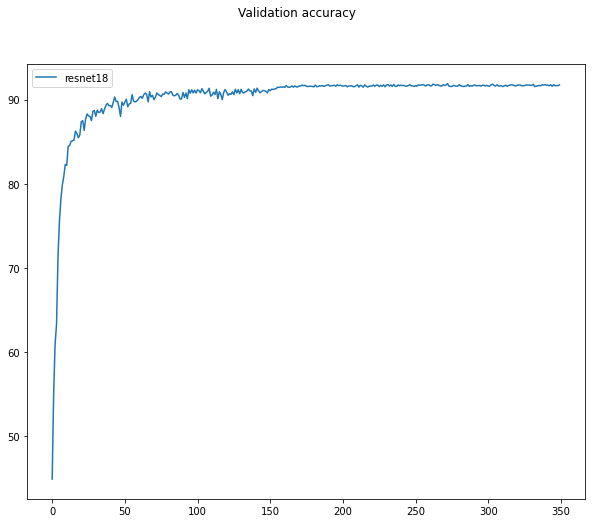


**** Ended Plotting multigraph ****



In [14]:
plot_multigraph(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy")


**** Started Plotting multigraph ****



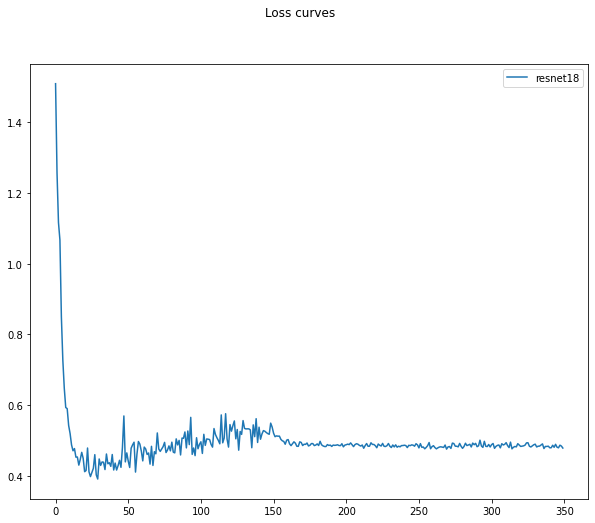


**** Ended Plotting multigraph ****



In [15]:
plot_multigraph(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves")

In [16]:
#torch.save(model, f'check_points/Session9_assignment_epochs_{EPOCHS}.h5')

In [10]:
model =torch.load(f'check_points/Session9_assignment_epochs_350.h5')

In [12]:
display_classwise_accuracy(test_loader,device,model,classes)

Accuracy of plane : 96.29629629629629
Accuracy of car : 100.0
Accuracy of bird : 87.5
Accuracy of cat : 87.87878787878788
Accuracy of deer : 81.81818181818181
Accuracy of dog : 89.47368421052632
Accuracy of frog : 100.0
Accuracy of horse : 100.0
Accuracy of ship : 100.0
Accuracy of truck : 91.42857142857143


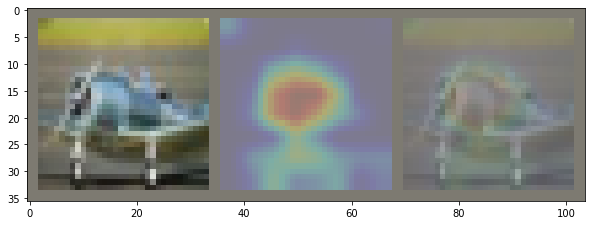

Prediction: plane, Actual: plane


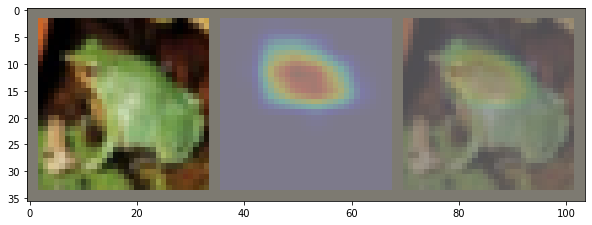

Prediction: deer, Actual: deer


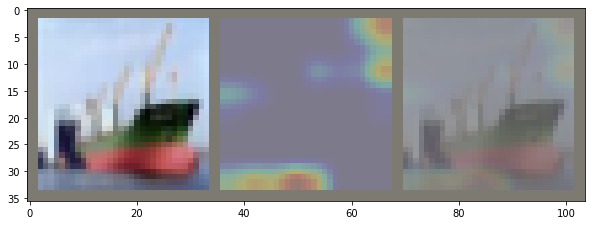

Prediction: ship, Actual: ship


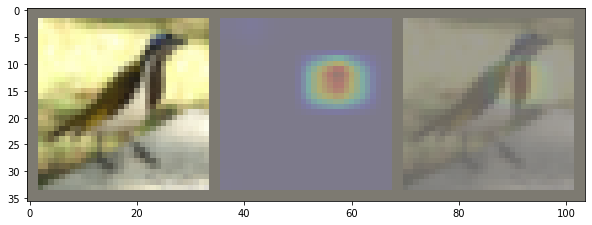

Prediction: bird, Actual: bird


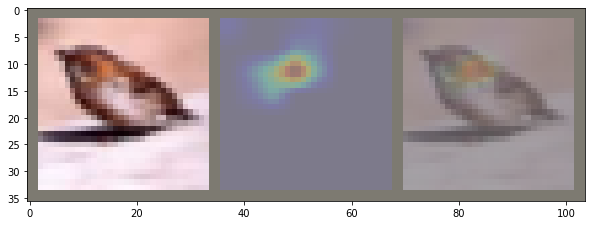

Prediction: bird, Actual: bird


In [16]:
configs = [dict(model_type='resnet', arch=model, layer_name='layer4')]
generate_grad_cam_grid(configs, classes, test_loader, device, model, matched=True)

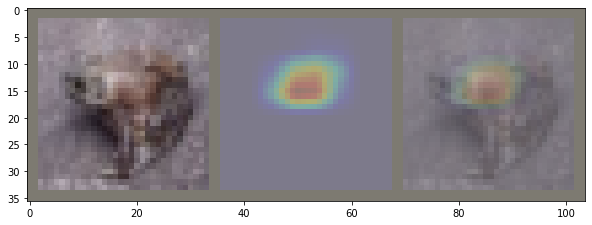

Prediction: deer, Actual: bird


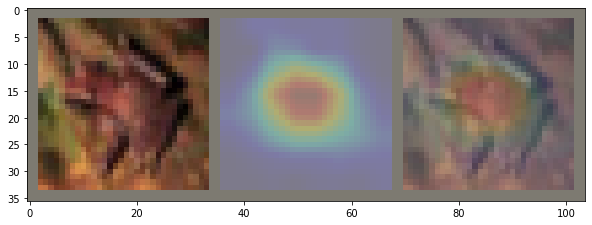

Prediction: dog, Actual: bird


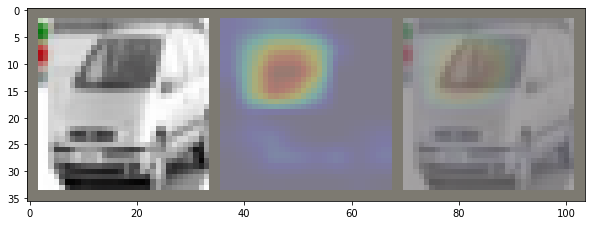

Prediction: cat, Actual: frog


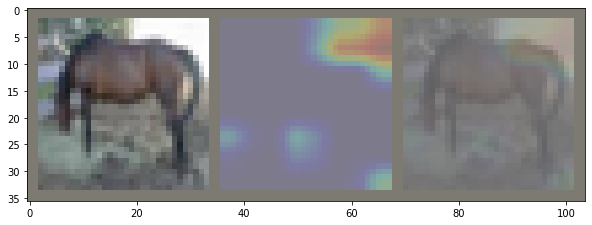

Prediction: bird, Actual: frog


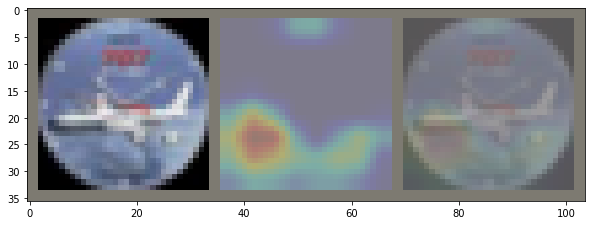

Prediction: ship, Actual: plane


In [13]:
generate_grad_cam_grid(configs, classes, test_loader, device, model, matched=False)